### What is Fake News?
A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

### What is a TfidfVectorizer?
TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

### What is a PassiveAggressiveClassifier?
Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

### Detecting Fake News with Python
To build a model to accurately classify a piece of news as REAL or FAKE.

### About Detecting Fake News with Python
This advanced python project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

### The fake news Dataset
This dataset has a shape of 7796×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.

### Project Prerequisites
You’ll need to install the following libraries with pip:

In [1]:
! pip install numpy pandas sklearn

You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


##### You’ll need to install Jupyter Lab to run your code. Get to your command prompt and run the following command

#### You’ll see a new browser window open up; create a new console and use it to run your code. To run multiple lines of code at once, press Shift+Enter.

### Steps for detecting fake news with Python
#### Follow the below steps for detecting fake news and complete your first advanced Python Project –

In [2]:
# Make necessary imports:

In [3]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Seaborn is an amazing visualization library for statistical graphics plotting in Python. 
It provides beautiful default styles and color palettes to make statistical plots more attractive.
It is built on the top of matplotlib library 
and also closely integrated to the data structures from pandas.

In [4]:
# Now, let’s read the data into a DataFrame, and get the shape 
#of the data and the first 5 records.

In [5]:
#Read the data
df=pd.read_csv("C:\\Users\\kavya\\OneDrive\\Desktop\\news.csv")
#Get shape and head

df.tail(5)

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [6]:
df.shape

(6335, 4)

In [7]:
# And get the labels from the DataFrame.

In [8]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
target = df.label.value_counts()
print(target)


REAL    3171
FAKE    3164
Name: label, dtype: int64


seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


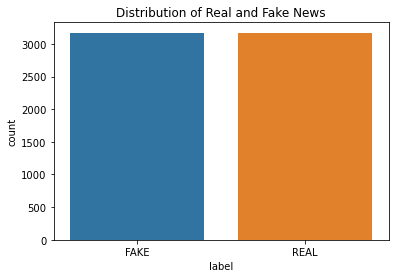

In [10]:
sns.countplot(df.label)
plt.title("Distribution of Real and Fake News")
plt.show()

In [11]:
# Split the dataset into training and testing sets.

In [12]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
# Parameters:

#*arrays: inputs such as lists, arrays, data frames, or matrices
#test_size: this is a float value whose value ranges between 0.0 and 1.0. it represents the proportion of our test size. its default value is none.
#train_size: this is a float value whose value ranges between 0.0 and 1.0. it represents the proportion of our train size. its default value is none.
#random_state: this parameter is used to control the shuffling applied to the data before applying the split. it acts as a seed.
#shuffle: This parameter is used to shuffle the data before splitting. Its default value is true.
#stratify: This parameter is used to split the data in a stratified fashion.

Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Term Frequency (tf)- It gives us the recurrence of the word in each report in the corpus. It is the proportion of the number of times the word shows up in a report contrasted with the all-out the number of words in that record. It increments as the quantity of events of that word inside the record increments.

Inverse Data Frequency (idf)- It is used to figure out the heaviness of uncommon words over all reports in the corpus. The words that occur seldom in the corpus have a high IDF score.

Joining these two, we think of the TF-IDF score (w) for a word in a record in the corpus.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [13]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics

How Passive-Aggressive Algorithms Work:
Passive-Aggressive algorithms are called so because :

Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not
    enough to cause any changes in the model. 
Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.


Important parameters:

C : This is the regularization parameter, and denotes the penalization the model will make on an incorrect prediction
max_iter : The maximum number of iterations the model makes over the training data.
tol : The stopping criterion. If it is set to None, the model will stop when (loss > previous_loss  –  tol). By default, it is set to 1e-3.
    

In [15]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)

pac.fit(tfidf_train,y_train)
# The fit (data) method is used to compute the mean and std dev for a given feature to be used further for scaling.
#The transform (data) method is used to perform scaling using mean and std dev calculated using the .fit () method.
#The fit_transform () method does both fits and transform.

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


 We got an accuracy of 92.82% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

syntax =sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [16]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])# parameters understanding refer this https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79

array([[590,  48],
       [ 42, 587]], dtype=int64)

So with this model, we have 590 true positives, 587 true negatives, 42 false negative, and 48 false positive.